<a href="https://colab.research.google.com/github/Azmafauzi/Azmafauzi/blob/circleci-project-setup/Film_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
from google.colab import files
uploaded = files.upload()
import io
top_movies = pd.read_csv(io.BytesIO(uploaded['Top 200 Movies.csv']))
# Dataset is now stored in a Pandas Dataframe



Saving Top 200 Movies.csv to Top 200 Movies.csv


In [7]:
top_movies.head(100)

,Title,Year of Release,Rating,Number of Reviews,Popularity Index,Movie Cast,Director,Description
0,The Shawshank Redemption,1994,9.3,2.6M,66,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont,Two imprisoned men bond over a number of years...
1,The Godfather,1972,9.2,1.8M,17,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",Francis Ford Coppola,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,9.0,2.6M,91,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,1974,9.0,1.2M,102,"['Al Pacino', 'Robert De Niro', 'Robert Duvall...",Francis Ford Coppola,The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,9.0,771K,446,"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...",Sidney Lumet,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...
95,North by Northwest,1959,8.3,324K,"1,118","['Cary Grant', 'Eva Marie Saint', 'James Mason...",Alfred Hitchcock,A New York City advertising executive goes on ...
96,Vertigo,1958,8.3,397K,385,"['James Stewart', 'Kim Novak', 'Barbara Bel Ge...",Alfred Hitchcock,A former San Francisco police detective juggle...
97,Amélie,2001,8.3,747K,442,"['Audrey Tautou', 'Mathieu Kassovitz', 'Rufus'...",Jean-Pierre Jeunet,Amélie is an innocent and naive girl in Paris ...
98,Come and See,1985,8.4,76K,201,"['Aleksey Kravchenko', 'Olga Mironova', 'Liubo...",Elem Klimov,"After finding an old rifle, a young boy joins ..."


In [8]:
top_movies.isnull().sum()

Title                0
Year of Release      0
Rating               0
Number of Reviews    0
Popularity Index     0
Movie Cast           0
Director             0
Description          0
dtype: int64

In [9]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              207 non-null    object 
 1   Year of Release    207 non-null    int64  
 2   Rating             207 non-null    float64
 3   Number of Reviews  207 non-null    object 
 4   Popularity Index   207 non-null    object 
 5   Movie Cast         207 non-null    object 
 6   Director           207 non-null    object 
 7   Description        207 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.1+ KB


In [10]:
top_movies['Popularity Index'] = top_movies['Popularity Index'].str.replace(',', '').astype(float)

In [11]:
top_movies["Number of Reviews"]=top_movies["Number of Reviews"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [12]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              207 non-null    object 
 1   Year of Release    207 non-null    int64  
 2   Rating             207 non-null    float64
 3   Number of Reviews  207 non-null    int64  
 4   Popularity Index   207 non-null    float64
 5   Movie Cast         207 non-null    object 
 6   Director           207 non-null    object 
 7   Description        207 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.1+ KB


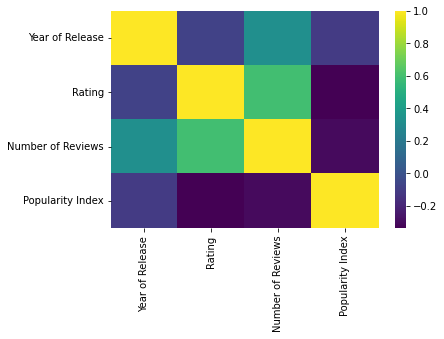

In [13]:
top_movies.corr()
sns.heatmap(top_movies.corr(),cmap="viridis")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


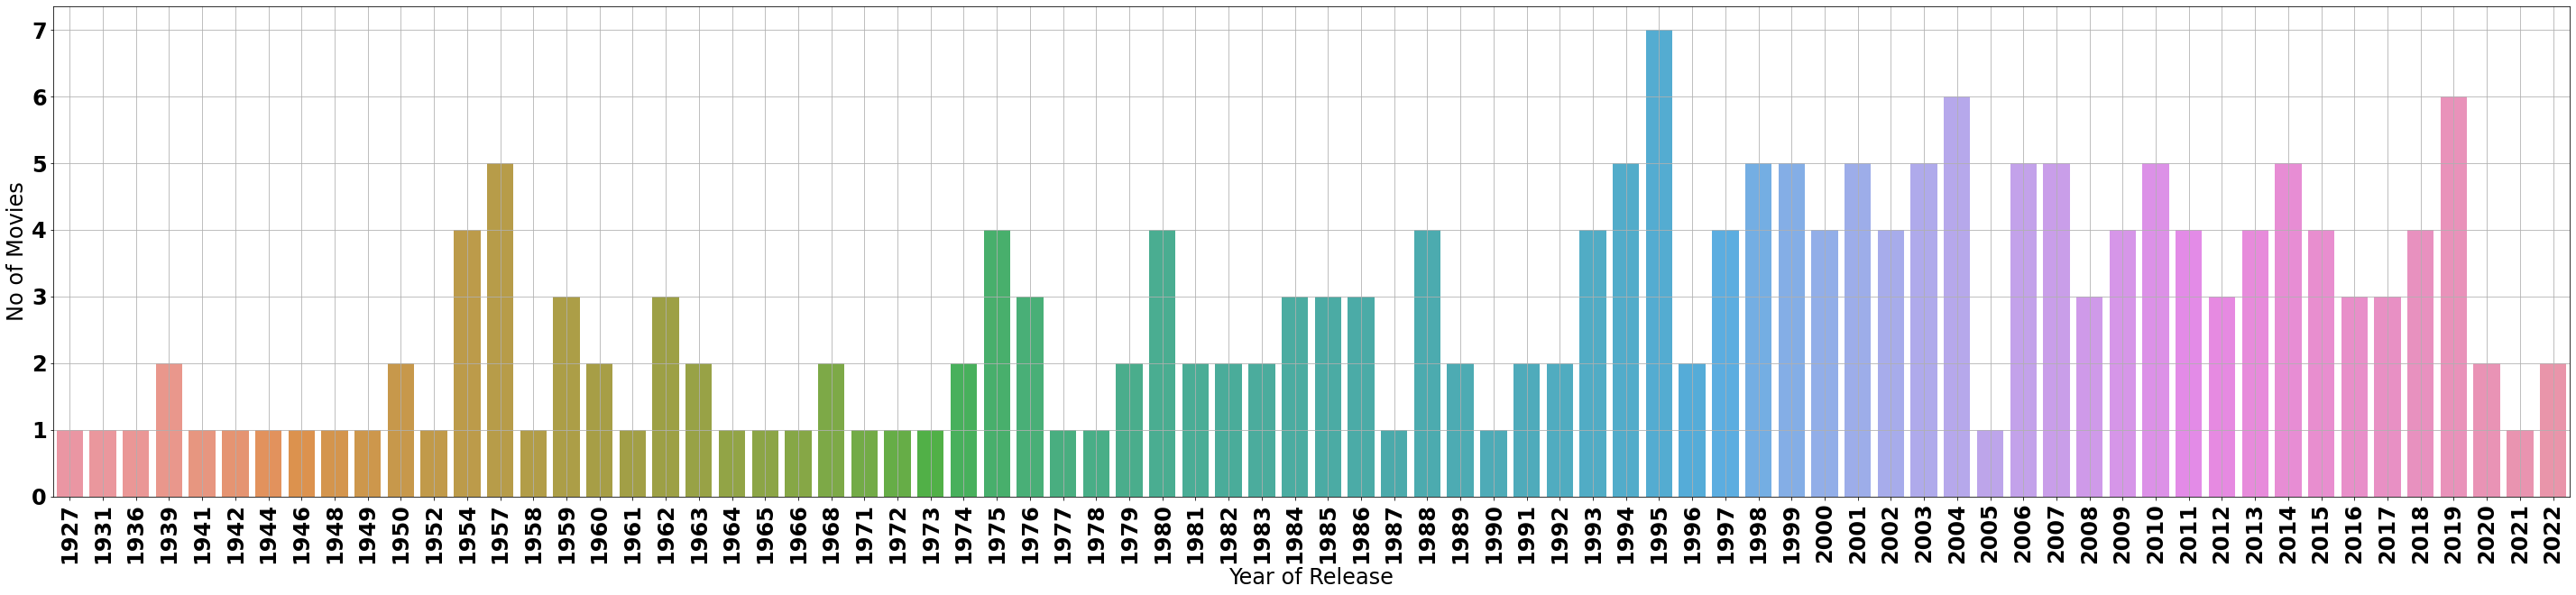

In [14]:
plt.figure(figsize=(50,10))
sns.countplot(top_movies['Year of Release'])
plt. xlabel('Year of Release',fontsize=24)
plt. ylabel('No of Movies',fontsize=24)
plt.xticks(rotation = 90,fontweight='bold',fontsize=24)
plt.yticks(fontweight='bold',fontsize=24)
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


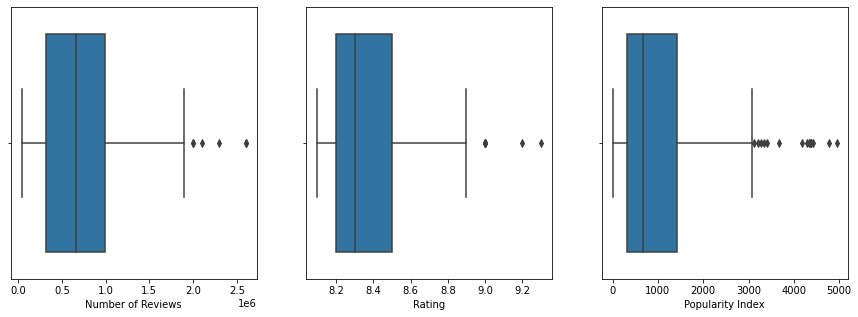

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(top_movies['Number of Reviews'],ax=axes[0])
sns.boxplot(top_movies['Rating'],ax=axes[1])
sns.boxplot(top_movies['Popularity Index'],ax=axes[2])

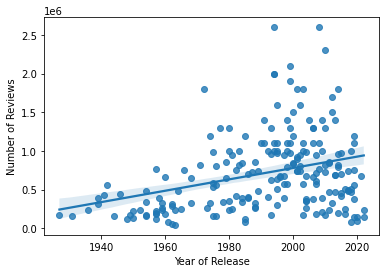

In [16]:
sns.regplot(x='Year of Release',y='Number of Reviews',data=top_movies)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


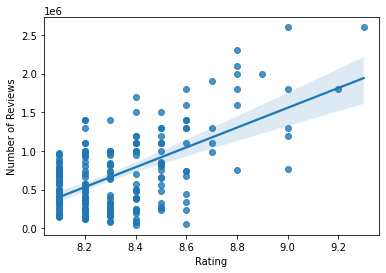

In [18]:
sns.regplot('Rating','Number of Reviews',data=top_movies)

In [28]:
fig = go.Figure(data=[go.Table(
                                
                                header=dict(values=['Title','Rating'],
                                line_color='darkslategray',
                                fill_color='cyan',
                                align='center',
                                font=dict(color="white", size=18)),
    
                                cells=dict(values=[top_movies.sort_values('Rating',ascending=False).iloc[0:10]['Title'],
                                           top_movies.sort_values('Rating',ascending=False).iloc[0:10]['Rating']],
                                line_color='darkslategray',
                                fill_color='white',
                                           align='center',
                                font=dict(color="darkslategray", size=10))
)])

fig.update_layout(width=800, height=600)
fig.show()

In [37]:

fig = go.Figure(data=[go.Table(
                                
                                header=dict(values=['Title','Number of Reviews'],
                                line_color='darkslategray',
                                fill_color='DarkGreen',
                                align='center',
                                font=dict(color="white", size=18)),
    
                                cells=dict(values=[top_movies.sort_values('Number of Reviews',ascending=False).iloc[0:10]['Title'],
                                                   top_movies.sort_values('Number of Reviews',ascending=False).iloc[0:10]['Number of Reviews']],
                                line_color='darkslategray',
                                fill_color='white',
                                           align='center',
                                font=dict(color="darkslategray", size=10))
)])

fig.update_layout(width=800, height=600)
fig.show()

In [40]:
fig = go.Figure(data=[go.Table(
                                
                                header=dict(values=['Title','Popularity Index'],
                                line_color='darkslategray',
                                fill_color='peachpuff',
                                align='center',
                                font=dict(color="white", size=20)),
    
                                cells=dict(values=[top_movies.sort_values('Popularity Index',ascending=False).iloc[0:10]['Title'],
                                                   top_movies.sort_values('Popularity Index',ascending=False).iloc[0:10]['Popularity Index']],
                                line_color='darkslategray',
                                fill_color='white',
                                           align='center',
                                font=dict(color="darkslategray", size=10))
)])

fig.update_layout(width=600, height=500)
fig.show()